In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(rc={'figure.figsize':(5, 4)})

### Задание 1.1

По определению, точечная оценка $\hat\theta_n$ является асимтотически нормальной, если $\sqrt{n}(\hat\theta_n - \theta)\stackrel{d}{\rightarrow} N(0, \sigma^{2}(\theta))$ (при $n\rightarrow \infty$), что можно также записать как $\frac{\sqrt{n}(\hat\theta_n - \theta)}{\sigma(\theta)}\stackrel{d}{\rightarrow} N(0, 1)$ (и если оценка $\hat\theta_n$ является асимптотически нормальной, то она состоятельная)

По условию задачи имеются $X_1, \ldots, X_n$ ~ i.i.d $F(x)$. Обозначим $\mu$ - мат. ожидание $X_i$, $\sigma^2$ - дисперсия, $x_{0.5}$ - квантиль порядка 0.5 (то есть медиана). Из [первого](https://www.math.ucla.edu/~tom/papers/unpublished/meanmed.pdf) и [второго](https://hannig.cloudapps.unc.edu/STOR655/handouts/Handout-asymptotics.pdf) источников были найдены дисперсии $\sigma^2$ для параметров мат. ожидания, дисперсии и медианы

Точечная оценка выборочное среднее будет асиматотически нормальной, если $\frac{\sqrt{n}(\overline{X}-\mu)}{\sigma} \rightarrow N(0,1)$

Точечная оценка выборочная дисперсия будет асимптотически нормальной, если $\frac{\sqrt{n}(S^2-\sigma^2)}{\sqrt{\mu_4 - \sigma^4}} \rightarrow N(0,1)$ (где $\mu_4$ - центральный момент 4-го порядка $E(X-EX)^4$)

Точечная оценка квантиль порядка 0.5 (медиана) будет асиматотически нормальной, если $\frac{\sqrt{n}(X_{(n\cdot 0.5)} - x_{0.5})}{\sqrt{\frac{1}{4p^2(x_{0.5})}}}$ (где $p(x_{0.5})$ - значение функции плотности в точке, являющейся теоретической медианой)

Для проверкки асиматотической нормальнойти этих трех выборочных функций было выбрано экспоненциальное распределение $X_{i}$ ~ $Exp(\lambda)$, у которого $\mu=\frac{1}{\lambda}$, $\sigma^2=\frac{1}{\lambda^2}$, $x_ {0.5}=\frac{ln(2)}{\lambda}$

In [2]:
def plot_histogram(data, title):
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label="Выборочные данные")
    
    # Теоретическое стандартное нормальное распределение
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', label=f"N(0, 1)")
    plt.axvline(0, color='b', linestyle='dashed', linewidth=2)
    plt.title(title)
    plt.legend()
    plt.show()

mu=0.2, mean_X=0.19999090724786237


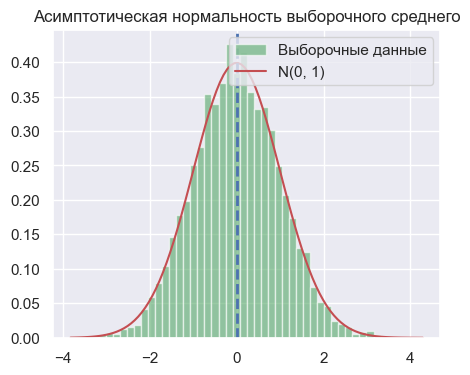

sigma^2=0.04, S^2=0.0399420216930886


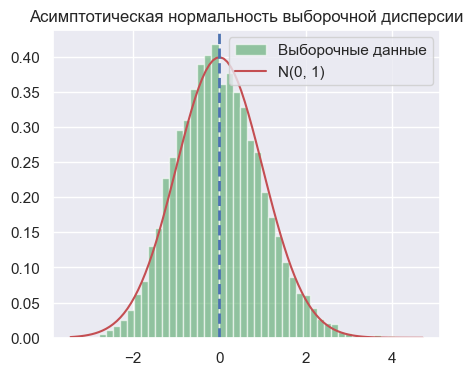

x_0.5=0.13862943611198905, med_X=0.13873683260183556


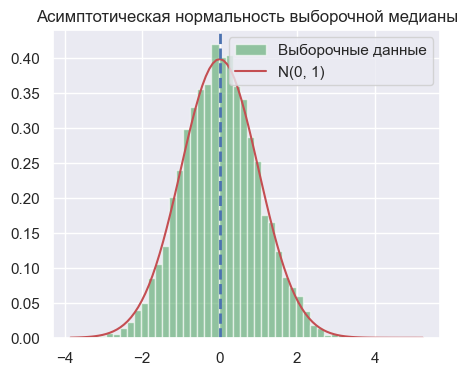

In [3]:
n_samples = 10000  # количество выборок
n = 1000 # объем выборки

lambda1 = 5  # параметр lambda экспоненциального распределения
distribution = stats.expon(scale=1/lambda1)  # эксп. распределение

mean_theory = 1 / lambda1  # мат. ожидание эксп. распр.
var_theory = 1 / (lambda1 ** 2)  # дисперсия эксп. распр.
median_theory = np.log(2) / lambda1  # медиана эксп. распр.
mu4 = distribution.expect(lambda x: (x - mean_theory) ** 4) # центральный момент 4-го порядка

# выборки выборочныых функций
samples = distribution.rvs(size=(n_samples, n))
means = samples.mean(axis=1)
variances = samples.var(axis=1)
medians = np.median(samples, axis=1)

as_std_mean = np.sqrt(var_theory)  # sigma для мат. ожидания
as_std_var = np.sqrt(mu4 - var_theory ** 2) # sigma для дисперсии
as_std_median = np.sqrt(1 / (4 * distribution.pdf(median_theory) ** 2)) # sigma для медианы

# нормализуем выборки для проверки асимптоьтической нормальности
Z_means = np.sqrt(n) * (np.array(means) - mean_theory) / as_std_mean
Z_variances = np.sqrt(n) * (np.array(variances) - var_theory) / as_std_var
Z_medians = np.sqrt(n) * (np.array(medians) - median_theory) / as_std_median

# Отображаем гистограммы преобразованных статистик
print(f"mu={mean_theory}, mean_X={np.mean(means)}")
plot_histogram(Z_means, "Асимптотическая нормальность выборочного среднего")
print(f"sigma^2={var_theory}, S^2={np.mean(variances)}")
plot_histogram(Z_variances, "Асимптотическая нормальность выборочной дисперсии")
print(f"x_0.5={median_theory}, med_X={np.mean(medians)}")
plot_histogram(Z_medians, "Асимптотическая нормальность выборочной медианы")


Видно, что гистрограммы для выборок из выборочных функций действительно аппроксимируются графиком плотности стандартного нормального распределения, значит, выборочное среднее, выборочная дисперсия и выборочная медиана являются асимптотически нормальными и, следовательно, состоятельными оценками

### Задание 1.2

Дано: $X_1,\ldots,X_n$ - i.i.d $F(x)$. Экспериментально убедиться в том, что $nF(X_{(2)}) \rightarrow Г(2,1)$ и $n(1-F(X_{(n)})) \rightarrow Г(1,1)=Exp(1)$

В рамках этого задания будут рассматриваться $X_i$ ~ $U[a,b]$

In [4]:
def plot_var_series(data, k, theta, title):
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label="Выборочные данные")
    
    # Теоретическое стандартное нормальное распределение
    x = np.linspace(min(data), max(data), 100)
    print(f"mu={k * theta}, mean_X={np.mean(data)}")
    print(f"sigma^2={k * theta ** 2}, S^2={np.var(data)}")
    plt.plot(x, stats.gamma(a=k, scale=theta).pdf(x), 'r-', label=f"Г({k}, {theta})")
    plt.title(title)
    plt.legend()
    plt.show()

mu=2, mean_X=2.0051921618891804
sigma^2=2, S^2=2.0007438777946804


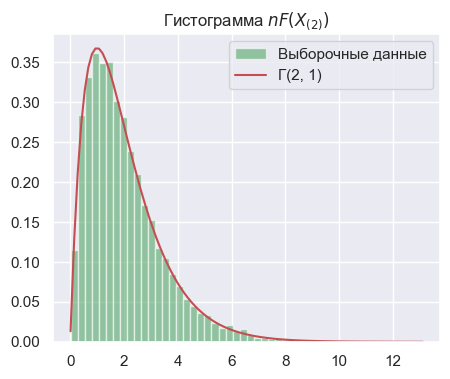

mu=1, mean_X=1.0031178155028033
sigma^2=1, S^2=1.02259109182213


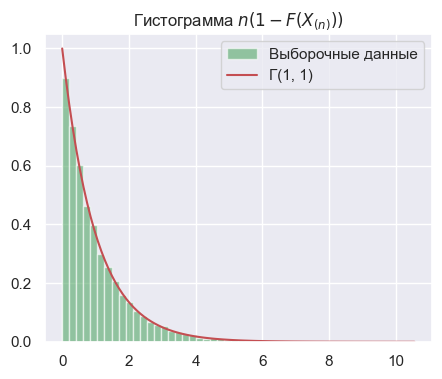

In [5]:
n_samples = 10000  # количество выборок
n = 1000 # объем выборки

a = 0  # параметры распределения
b = 5
distribution = stats.uniform(loc=a, scale=b)
samples = np.sort(distribution.rvs(size=(n_samples, n)), axis=1)
X_2 = samples[:, 1]
X_n = samples[:, -1]
# получение 2-й и n-й порядковой статистики
sec_el_sample = n * distribution.cdf(X_2)
nth_el_sample = n * (1 - distribution.cdf(X_n))


plot_var_series(sec_el_sample, 2, 1, "Гистограмма "+ r"$nF(X_{(2)})$")
plot_var_series(nth_el_sample, 1, 1, "Гистограмма " + r"$n(1-F(X_{(n)}))$")

По графикам видно, что гистограммы $nF(X_{(2)})$ и $n(1-F(X_{(n)}))$ действительно аппроксимируются плотностями для $\Gamma(2, 1)$ и $\Gamma(1, 1)$. Также в прошлом задании было установлено, что выборочное среднее и выборочная медиана - состоятельные оценки, поэтому тут выводятся они для выборок из порядковых статистик, и видно, что они примерно равны мат. ожиданию и дисперсии гамма-распределения

### Задание 2

In [6]:
df = pd.read_csv("cars93.csv")

##### Распределение автомобилей по типам

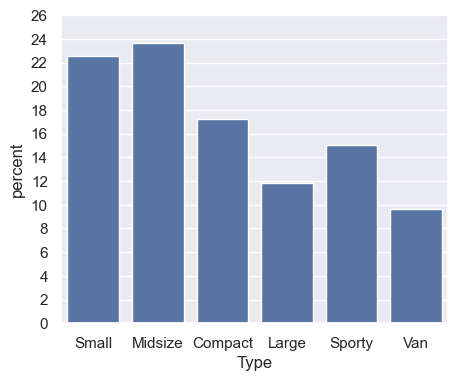

In [7]:
ax = sns.countplot(df, x="Type", stat="percent")
plt.yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1] + 2, 2))
plt.show(ax)

Видно, что в датасете наиболее распространены (~23%) автомобили среднего размера, наименее распространены (~9%) - фургоны / минивэны

In [8]:
all_types_power = [
    "All", df["Horsepower"].mean(), df["Horsepower"].median(), df["Horsepower"].var(ddof=0), 
    df["Horsepower"].quantile(0.75) - df["Horsepower"].quantile(0.25)
]
power_by_types = df.groupby("Type").agg(
    Mean=("Horsepower", "mean"), Median=("Horsepower", "median"), 
    Variance=("Horsepower", lambda x: np.var(x, ddof=0)), 
    InterqRange=("Horsepower", lambda x: x.quantile(0.75) - x.quantile(0.25))
).reset_index()
power_by_types.loc[len(df)] = all_types_power
power_by_types = power_by_types.reset_index().drop(columns=["index"])

In [9]:
power_by_types

,Type,Mean,Median,Variance,InterqRange
0,Compact,131.000000,132.0,486.125000,33.25
1,Large,179.454545,170.0,433.702479,25.00
2,Midsize,173.090909,169.0,2630.809917,69.00
3,Small,91.000000,90.0,426.285714,21.00
4,Sporty,160.142857,147.5,5140.836735,72.25
5,Van,149.444444,151.0,329.135802,23.00
6,All,143.827957,140.0,2713.583304,67.00


In [10]:
def get_ecdf(x):
    data = np.sort(x)
    values, counts = np.unique(data, return_counts=True)
    return values, np.cumsum(counts) / len(data)

In [11]:
def plot_data(x, type_str,  df):
    _, ax = plt.subplots(3, 1, figsize=(9, 18))

    values, probs = get_ecdf(x)  # эмпирическая ф. распр. 
    ax[0].step(np.append(values[0] - 0.01, values), np.append([0], probs))
    ax[0].set_yticks(np.arange(0, 1.05, 0.05))
    ax[0].set_xticks(np.arange(values[0], values[-1] + 10, 10))
    ax[0].set_title(f"eCDF для типа {type_str}")
    ax[0].set_ylabel(r"$\hat F(t)$")
    ax[0].set_xlabel(r"$t$")

    nbins = np.ceil((x.max() - x.min()) / (1.0 + np.log2(len(x))))
    nbins = int(max(1, nbins))
    ax[1].hist(x, bins=nbins, density=True)  # отрисовка гистограммы
    ax[1].set_xticks(np.arange(values[0], values[-1] + 10, 10))
    ax[1].set_title(f"Гистограмма для типа {type_str}")
    ax[1].set_ylabel(r"$hist(t)$")
    ax[1].set_xlabel(r"$t$")

    ax[2].boxplot(x)  # отрисовка boxplot
    ax[2].set_yticks(np.arange(values[0], values[-1] + 10, 10))
    ax[2].set_xticks([])
    ax[2].set_title(f"Boxplot для типа {type_str}")
    ax[2].set_ylabel(r"$values$")

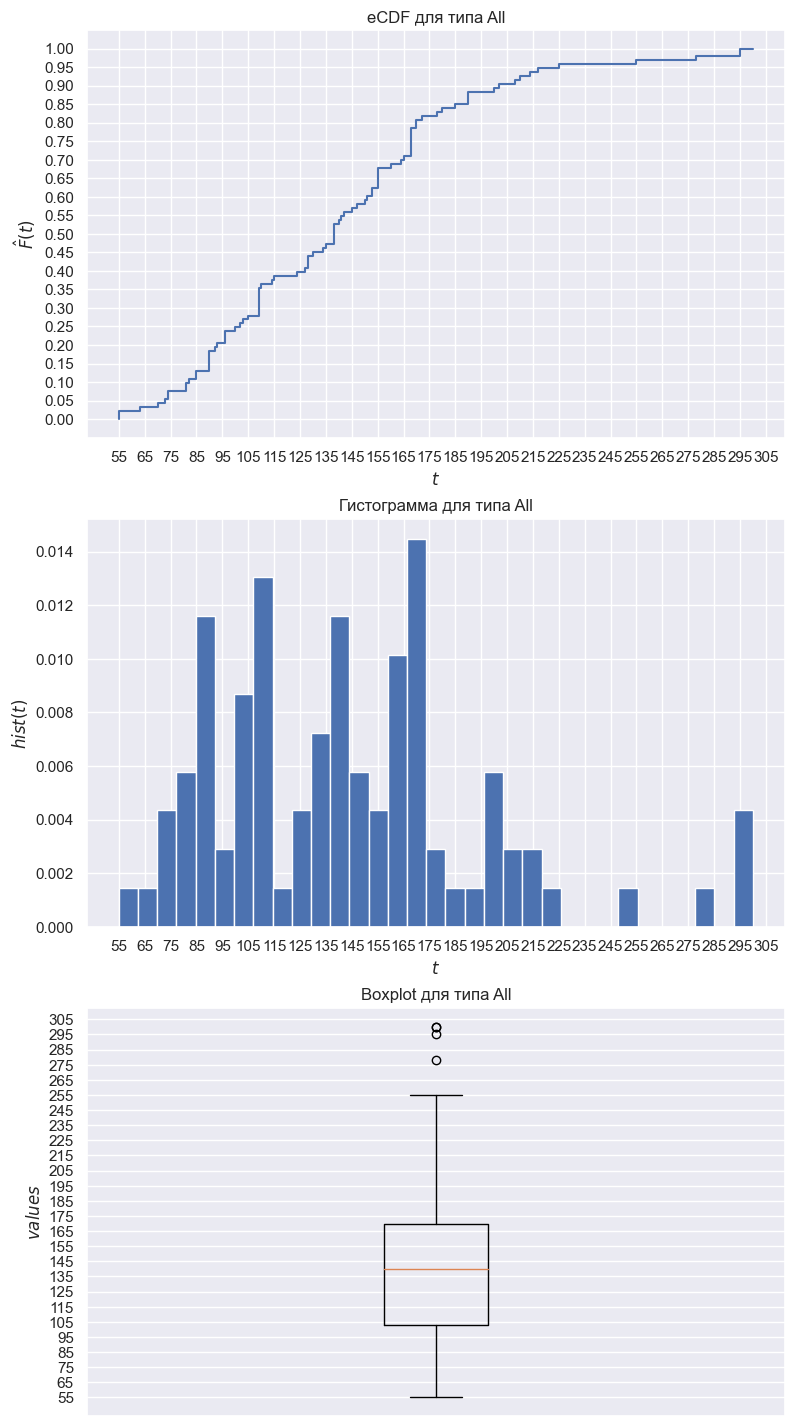

In [12]:
plot_data(df["Horsepower"], "All", power_by_types)

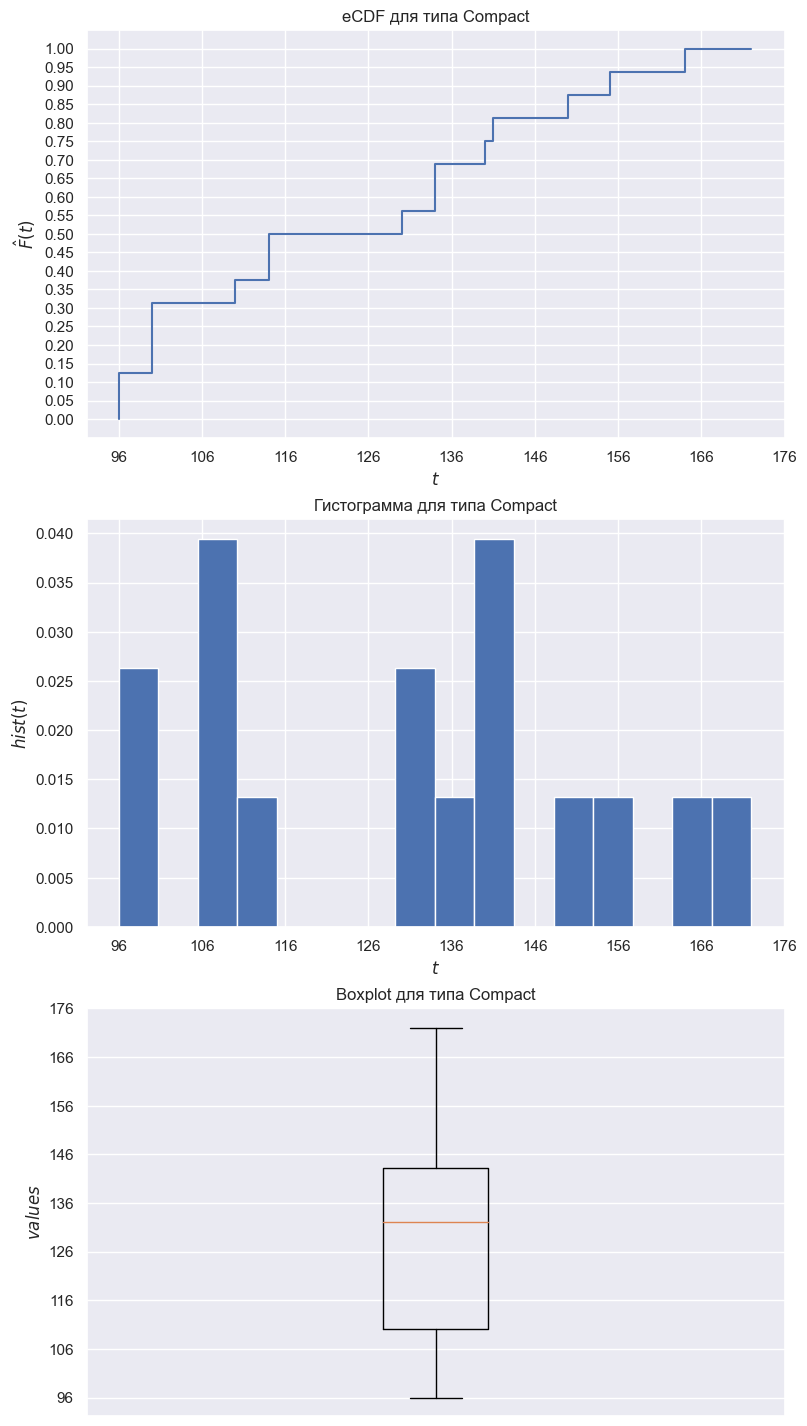

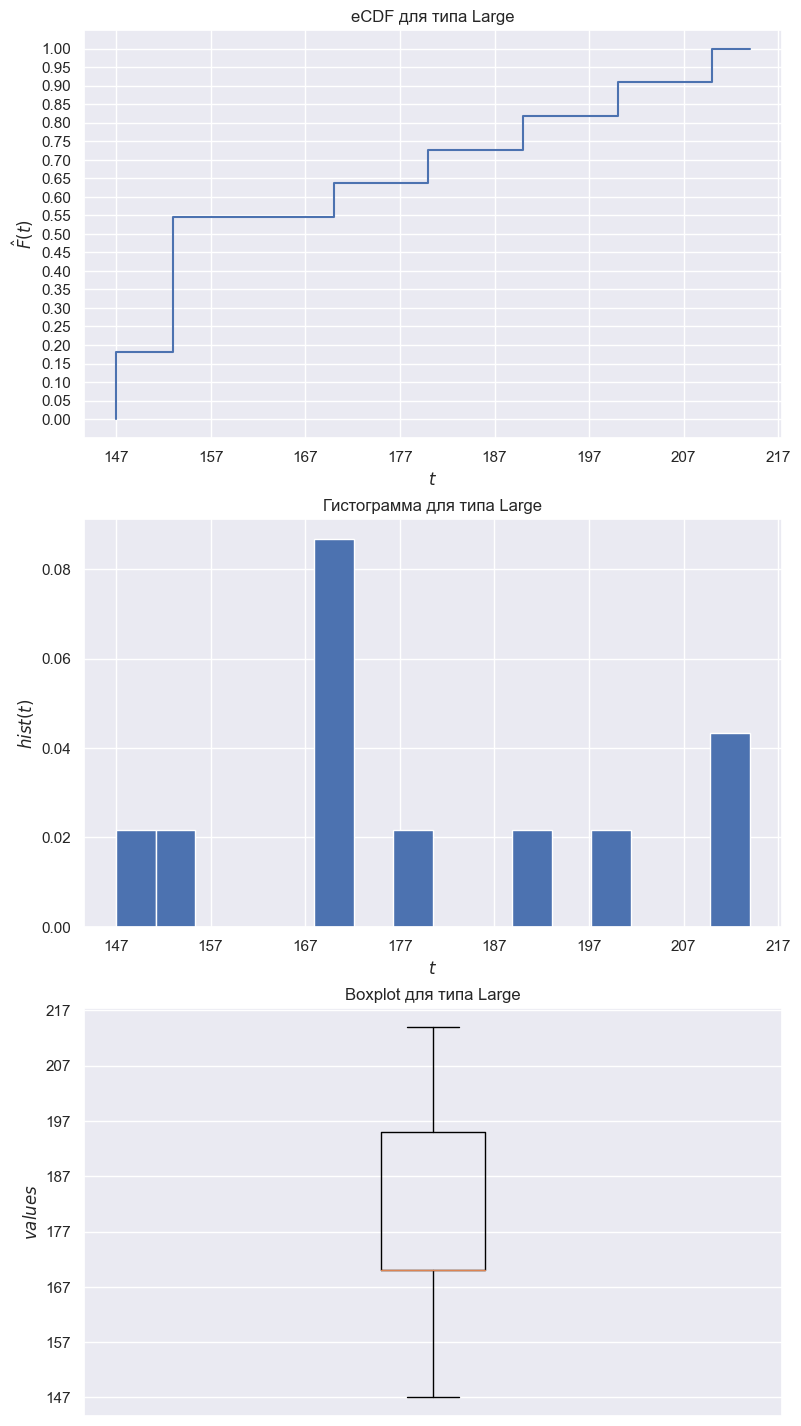

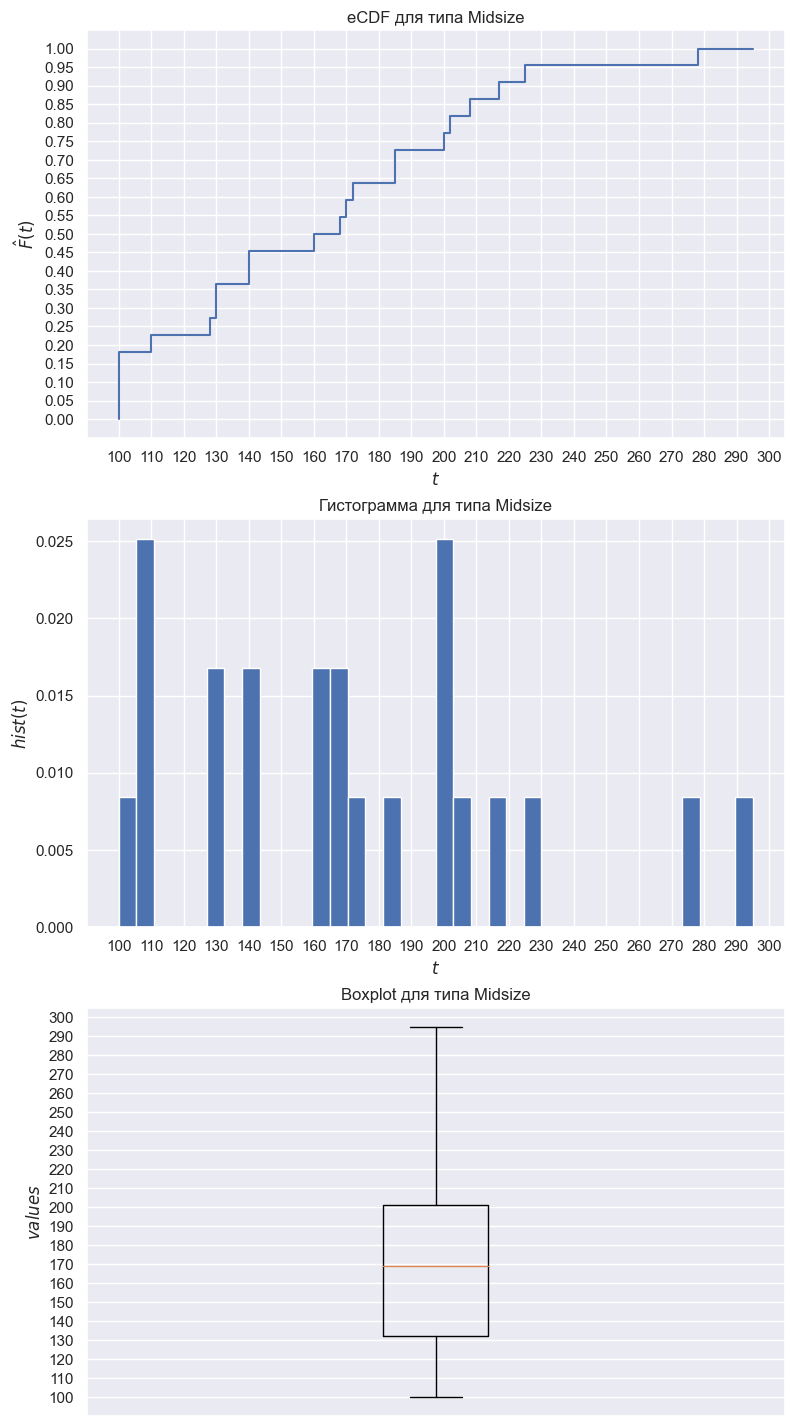

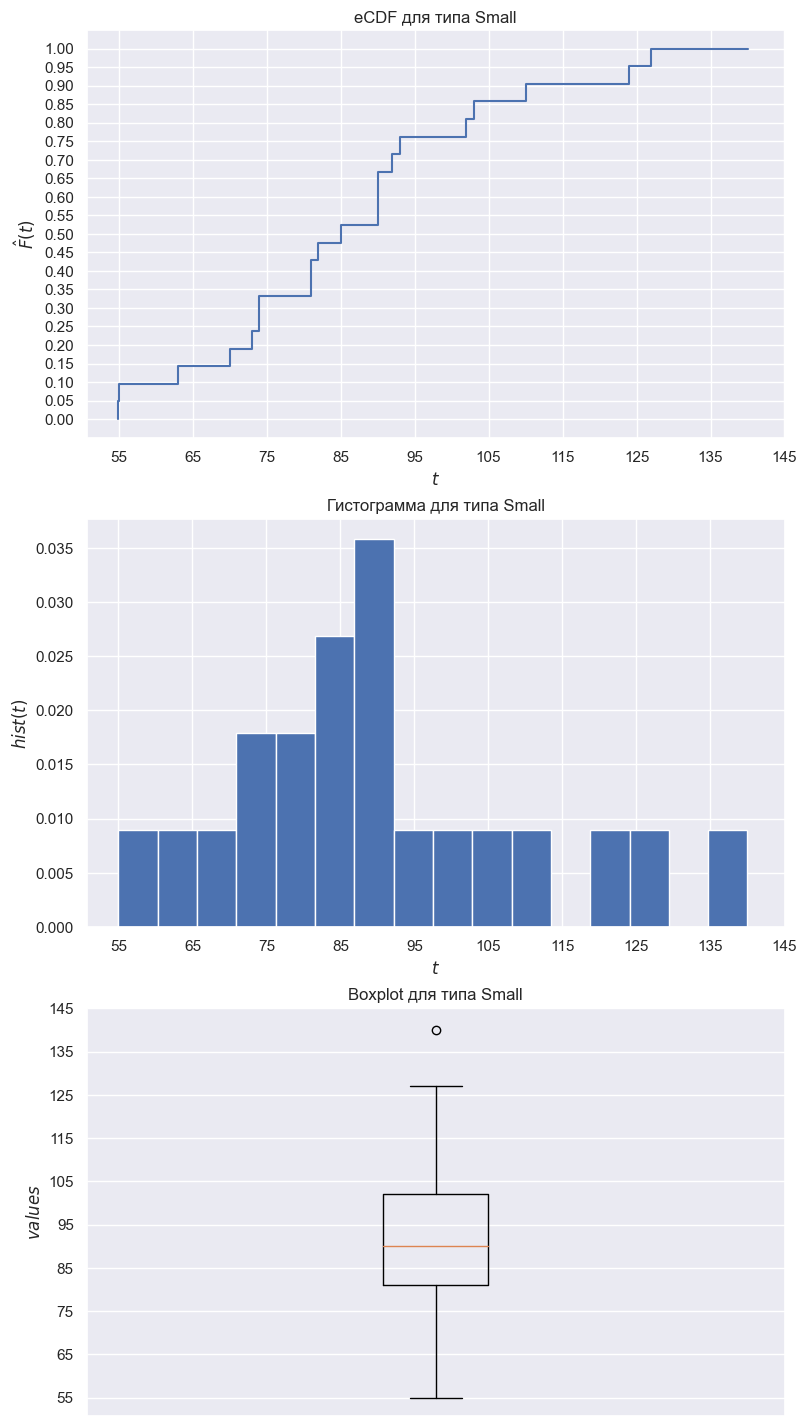

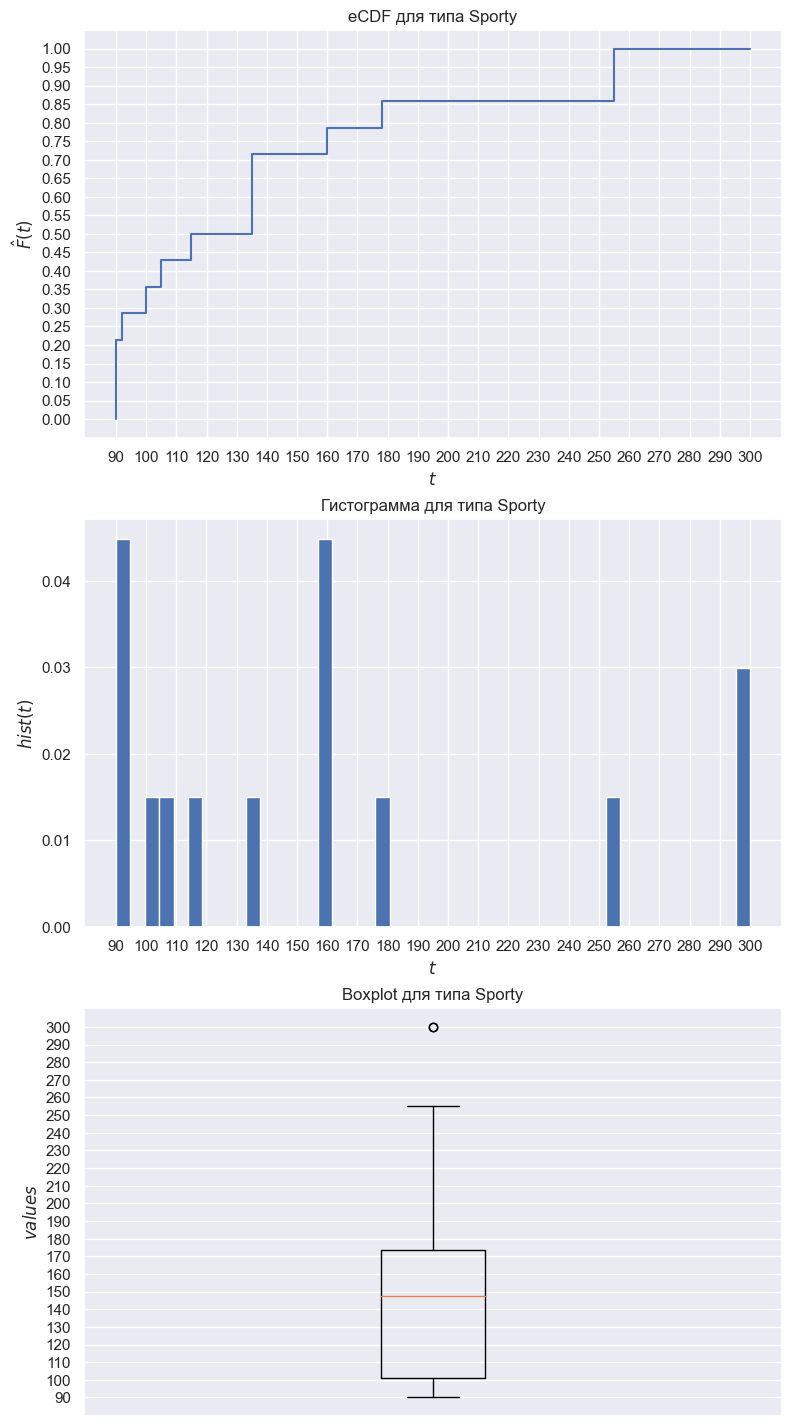

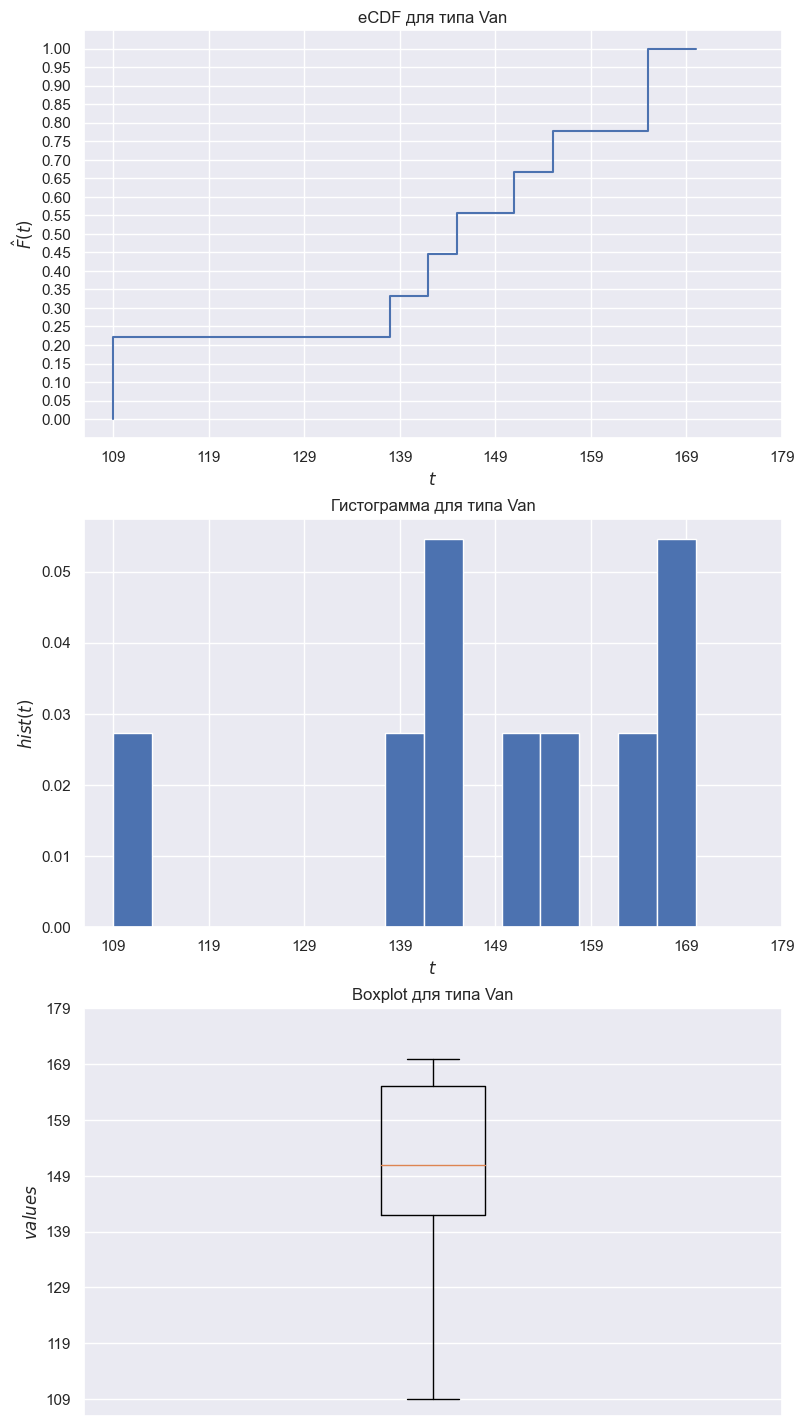

In [13]:
for i in df.groupby("Type"):
    plot_data(i[1]["Horsepower"], i[0], power_by_types)